In [1]:
import pandas as pd

data = pd.read_csv("Household-rcycling-borough.csv")

print(data.head(5))


ModuleNotFoundError: No module named 'pandas'

In [11]:
# 检查数据集的基本信息
print(data.info())

# 显示统计信息
print(data.describe())
print(data.shape)

# 检查是否有空缺值
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Code             860 non-null    object
 1   Area             860 non-null    object
 2   Year             860 non-null    object
 3   Recycling_Rates  860 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 27.0+ KB
None
       Recycling_Rates
count       860.000000
mean         31.909302
std          10.419877
min           2.000000
25%          25.000000
50%          32.000000
75%          40.000000
max          55.000000
(860, 4)
Code               0
Area               0
Year               0
Recycling_Rates    0
dtype: int64


In [3]:
# 如果存在空缺值，可以根据需要填充或者删除
# 填充缺失值为0
data.fillna(0, inplace=True)
# 或者，删除包含缺失值的行
data.dropna(inplace=True)

In [4]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Code             860 non-null    object
 1   Area             860 non-null    object
 2   Year             860 non-null    object
 3   Recycling_Rates  860 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 27.0+ KB
None
       Recycling_Rates
count       860.000000
mean         31.909302
std          10.419877
min           2.000000
25%          25.000000
50%          32.000000
75%          40.000000
max          55.000000
Code               0
Area               0
Year               0
Recycling_Rates    0
dtype: int64


In [5]:
# 计算四分位数和四分位距
Q1 = data['Recycling_Rates'].quantile(0.25)
Q3 = data['Recycling_Rates'].quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的范围
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 筛选异常值
outliers = data[(data['Recycling_Rates'] < lower_bound) | (data['Recycling_Rates'] > upper_bound)]
print("异常值：\n", outliers)

# 删除异常值
cleaned_data = data[(data['Recycling_Rates'] >= lower_bound) & (data['Recycling_Rates'] <= upper_bound)]


异常值：
          Code    Area     Year  Recycling_Rates
24  E09000025  Newham  2003/04                2


In [6]:
# 计算相关系数
correlation_matrix = cleaned_data.corr()
print("相关系数矩阵：\n", correlation_matrix)


ValueError: could not convert string to float: 'E09000001'

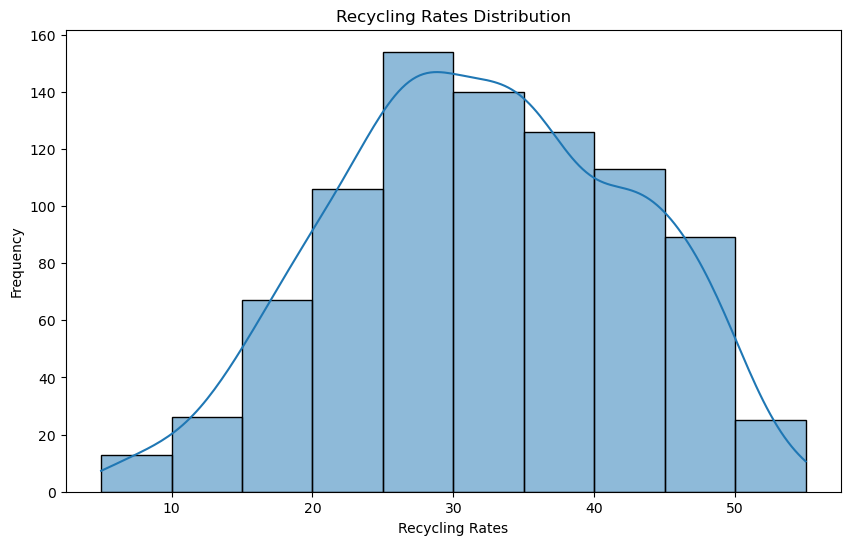

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制回收率的分布图
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Recycling_Rates'], bins=10, kde=True)
plt.title('Recycling Rates Distribution')
plt.xlabel('Recycling Rates')
plt.ylabel('Frequency')
plt.show()


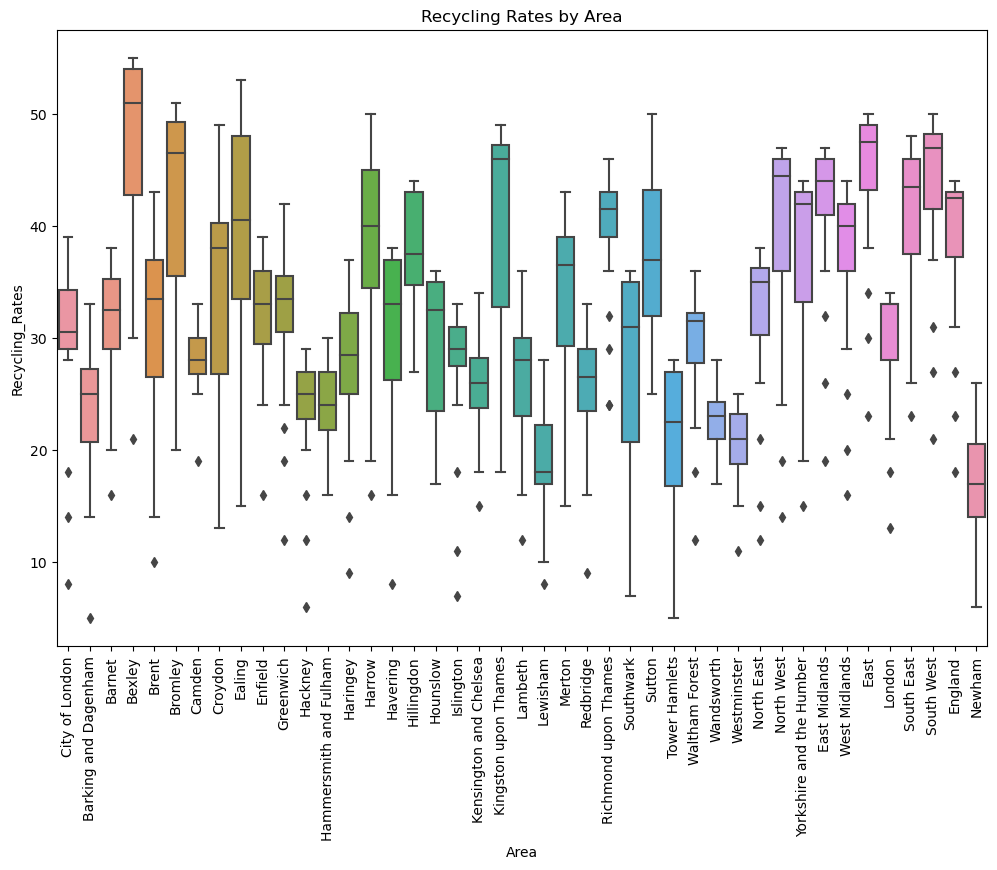

In [8]:
# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='Area', y='Recycling_Rates', data=cleaned_data)
plt.xticks(rotation=90)
plt.title('Recycling Rates by Area')
plt.show()
